### Libraries

In [1]:
import pandas as pd

### Importing data

In [47]:
stock_tweet_data = pd.read_csv("../data/scored_tweets_final_translated.csv")

stock_tweet_data['Datetime'] = pd.to_datetime(stock_tweet_data['Datetime'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

stock_tweet_data.head()

,Stock,Datetime,user.screen_name,id_str,text,Sentiment,Known_Pumper,Price_Region,Inflection_Point,user_pumper_probability,hashtag_count,emoji_count,keyword_count,stock_ticker_count,url_count,pumper_category
0,AXTG,2021-03-25 17:50:13+00:00,UCitnow,1375142994920271872a,#RT @ldev117: RT @UCitnow: @ShortSqueezed1 @EV...,0,0,1.0,NaN,0.006720,1,0,0,1,1,0
1,AXTG,2021-03-25 17:50:48+00:00,UCitnow,1375143141058080768a,RT @UCitnow: #RT @ldev117: RT @UCitnow: @Short...,0,0,1.0,NaN,0.006720,1,0,0,1,1,0
2,AXTG,2021-03-25 18:47:48+00:00,Rad7RR,1375157484063584261a,$AXTG Big OTC % Gainer!,1,0,1.0,NaN,0.025278,0,3,0,1,0,0
3,AXTG,2021-03-25 20:02:03+00:00,GetScanz,1375176172099747845a,Today’s Top Penny Stock Gainers\n\n$LTTGF $AXT...,1,0,1.0,NaN,0.025278,1,0,1,9,1,0
4,AXTG,2021-03-25 20:02:48+00:00,christinebarnum,1375176361560604679a,RT @GetScanz: Today’s Top Penny Stock Gainers\...,1,0,1.0,NaN,0.025278,3,0,1,9,0,0


In [3]:
list(stock_tweet_data.columns)

['Stock',
 'Datetime',
 'user.screen_name',
 'id_str',
 'text',
 'Sentiment',
 'Known_Pumper',
 'Price_Region',
 'Inflection_Point',
 'user_pumper_probability',
 'hashtag_count',
 'emoji_count',
 'keyword_count',
 'stock_ticker_count',
 'url_count',
 'pumper_category']

### Data processing

#### Mentioned handles

In [48]:
import re

def count_handles(text):
    """Counts the number of Twitter handles (@username) in a tweet."""
    handles = re.findall(r'@\w+', text)
    return len(handles)

stock_tweet_data['handles_mentioned'] = stock_tweet_data['text'].apply(count_handles)

In [10]:
stock_tweet_data

,Stock,Datetime,user.screen_name,id_str,text,Sentiment,Known_Pumper,Price_Region,Inflection_Point,user_pumper_probability,hashtag_count,emoji_count,keyword_count,stock_ticker_count,url_count,pumper_category,handles_mentioned
0,AXTG,2021-03-25 17:50:13+00:00,UCitnow,1375142994920271872a,#RT @ldev117: RT @UCitnow: @ShortSqueezed1 @EV...,0,0,1.0,NaN,0.006720,1,0,0,1,1,0,4
1,AXTG,2021-03-25 17:50:48+00:00,UCitnow,1375143141058080768a,RT @UCitnow: #RT @ldev117: RT @UCitnow: @Short...,0,0,1.0,NaN,0.006720,1,0,0,1,1,0,5
2,AXTG,2021-03-25 18:47:48+00:00,Rad7RR,1375157484063584261a,$AXTG Big OTC % Gainer!,1,0,1.0,NaN,0.025278,0,3,0,1,0,0,0
3,AXTG,2021-03-25 20:02:03+00:00,GetScanz,1375176172099747845a,Today’s Top Penny Stock Gainers\n\n$LTTGF $AXT...,1,0,1.0,NaN,0.025278,1,0,1,9,1,0,0
4,AXTG,2021-03-25 20:02:48+00:00,christinebarnum,1375176361560604679a,RT @GetScanz: Today’s Top Penny Stock Gainers\...,1,0,1.0,NaN,0.025278,3,0,1,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10071,EEENF,2021-04-09 01:00:55+00:00,TVTVentures,1380324815689539585a,Holding until at least summer $WDHR $EEENF $PH...,1,0,0.0,NaN,0.025278,0,4,0,5,0,0,0
10072,EEENF,2021-04-09 01:06:47+00:00,BuyLowSell420,1380326289735708672a,@TheFlyingScotto Yep well now that the bushy a...,-1,0,0.0,NaN,0.025278,0,0,0,0,1,0,1
10073,EEENF,2021-04-09 01:06:56+00:00,superlars34,1380326328524623873a,$VPER $PHIL $IMTL $ABML $UATG $SFOR $LTNC $IN...,1,0,0.0,NaN,0.025278,0,1,0,15,1,0,0
10074,EEENF,2021-04-09 01:07:55+00:00,DaveWhitman12,1380326575414120448a,RT @Jasontrade99: $ eeenf,1,0,0.0,NaN,0.025278,0,17,0,1,0,0,1


#### Retweet count

In [49]:
def calculate_retweet_count(df):
    """Calculates retweet count based on 'RT @' presence in the text."""

    df['is_retweet'] = df['text'].str.startswith('RT @')
    df['retweet_count'] = df['is_retweet'].astype(int)  # Convert True/False to 1/0
    return df

stock_tweet_data = calculate_retweet_count(stock_tweet_data)

# You can then aggregate or analyze the retweet_count column
# Example: Count retweets per user
retweets_per_user = stock_tweet_data.groupby('user.screen_name')['retweet_count'].sum()

print(max(retweets_per_user))

322


#### Mentions by other users

In [50]:
def count_mentions_by_others(df):
    """Counts how many times each user is mentioned by others."""

    mentions = {}
    for index, row in df.iterrows():
        mentioned_handles = re.findall(r'@\w+', row['text'])
        for handle in mentioned_handles:
            handle = handle.lstrip('@')  # Remove the '@'
            if handle not in mentions:
                mentions[handle] = 0
            mentions[handle] += 1

    df['mentions_by_others'] = df['user.screen_name'].apply(lambda user: mentions.get(user, 0))
    return df

stock_tweet_data = count_mentions_by_others(stock_tweet_data)

#### Inactivity then sudden activity

In [51]:
import pandas as pd

def calculate_activity_changes_manual(df):
    """Calculates tweet frequency and activity changes manually with 1-day and 3-day windows."""

    activity_changes = []
    for user, user_df in df.groupby('user.screen_name'):
        user_df = user_df.sort_values('Datetime')
        user_df = user_df.reset_index(drop=True)

        # 1-day window calculations
        tweet_frequencies_1d = []
        frequency_changes_1d = []

        for i in range(len(user_df)):
            current_time = user_df['Datetime'].iloc[i]
            window_start = current_time - pd.Timedelta(days=1)  # 1-day window

            count = 0
            for j in range(i + 1):
                if user_df['Datetime'].iloc[j] >= window_start:
                    count += 1
            tweet_frequencies_1d.append(count)

            if i > 0:
                frequency_changes_1d.append(tweet_frequencies_1d[-1] - tweet_frequencies_1d[-2])
            else:
                frequency_changes_1d.append(0)

        user_df['tweet_frequency_1d'] = tweet_frequencies_1d
        user_df['frequency_change_1d'] = frequency_changes_1d

        # 3-day window calculations
        tweet_frequencies_3d = []
        frequency_changes_3d = []

        for i in range(len(user_df)):
            current_time = user_df['Datetime'].iloc[i]
            window_start = current_time - pd.Timedelta(days=3)  # 3-day window

            count = 0
            for j in range(i + 1):
                if user_df['Datetime'].iloc[j] >= window_start:
                    count += 1
            tweet_frequencies_3d.append(count)

            if i > 0:
                frequency_changes_3d.append(tweet_frequencies_3d[-1] - tweet_frequencies_3d[-2])
            else:
                frequency_changes_3d.append(0)

        user_df['tweet_frequency_3d'] = tweet_frequencies_3d
        user_df['frequency_change_3d'] = frequency_changes_3d

        activity_changes.append(user_df)

    activity_changes_df = pd.concat(activity_changes)
    return activity_changes_df

stock_tweet_data = calculate_activity_changes_manual(stock_tweet_data)

print(stock_tweet_data[['user.screen_name', 'Datetime', 'tweet_frequency_1d', 'frequency_change_1d', 'tweet_frequency_3d', 'frequency_change_3d']].head(20))

  user.screen_name                  Datetime  tweet_frequency_1d  \
0     00FF00008000 2021-03-29 08:46:02+00:00                   1   
0    01stocksavage 2021-03-29 19:02:16+00:00                   1   
0       020626susu 2021-03-30 23:50:30+00:00                   1   
0  0520tamasan1972 2021-03-28 07:01:22+00:00                   1   
1  0520tamasan1972 2021-03-28 09:36:58+00:00                   2   
0         0524Gaku 2021-03-28 17:06:20+00:00                   1   
0  08YkMVCN4ZZAfHN 2021-03-28 13:22:14+00:00                   1   
0    0AhmedHakami0 2021-03-23 07:32:59+00:00                   1   
1    0AhmedHakami0 2021-03-24 01:27:46+00:00                   2   
2    0AhmedHakami0 2021-03-24 23:45:27+00:00                   2   
3    0AhmedHakami0 2021-03-30 11:24:50+00:00                   1   
0  0R9Tzvb2vyVVu31 2021-03-29 14:04:10+00:00                   1   
0            0TC_G 2021-04-06 14:32:55+00:00                   1   
0        0nly0neEa 2021-03-29 14:09:47+00:00    

#### Node centrality

In [ ]:
import networkx as nx
import re
import pandas as pd

def create_mention_graph(df):
    """Creates a directed graph of user mentions (including external mentions)."""

    G = nx.DiGraph()

    for index, row in df.iterrows():
        user = row['user.screen_name']
        G.add_node(user)  # Add the user as a node

        mentioned_handles = re.findall(r'@\w+', row['text'])

        for handle in mentioned_handles:
            mentioned_user = handle.lstrip('@')
            G.add_node(mentioned_user)  # Add the mentioned user as a node (always)
            G.add_edge(user, mentioned_user)  # Add the edge

    return G

def calculate_node_centrality(G):
    """Calculates node centrality metrics."""

    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G, weight=None, tol=1e-03) #tol added to avoid errors.

    return degree_centrality, betweenness_centrality, eigenvector_centrality

def add_centrality_to_dataframe(df, degree_centrality, betweenness_centrality, eigenvector_centrality):
    """Adds centrality metrics to the DataFrame."""

    df['degree_centrality'] = df['user.screen_name'].apply(lambda user: degree_centrality.get(user, 0))
    df['betweenness_centrality'] = df['user.screen_name'].apply(lambda user: betweenness_centrality.get(user, 0))
    df['eigenvector_centrality'] = df['user.screen_name'].apply(lambda user: eigenvector_centrality.get(user, 0))
    return df

mention_graph = create_mention_graph(stock_tweet_data)
degree_centrality, betweenness_centrality, eigenvector_centrality = calculate_node_centrality(mention_graph)
stock_tweet_data = add_centrality_to_dataframe(stock_tweet_data, degree_centrality, betweenness_centrality, eigenvector_centrality)

  user.screen_name  degree_centrality  betweenness_centrality  \
0     00FF00008000           0.000982                     0.0   
0    01stocksavage           0.000245                     0.0   
0       020626susu           0.000245                     0.0   
0  0520tamasan1972           0.000245                     0.0   
1  0520tamasan1972           0.000245                     0.0   
0         0524Gaku           0.000245                     0.0   
0  08YkMVCN4ZZAfHN           0.000245                     0.0   
0    0AhmedHakami0           0.000982                     0.0   
1    0AhmedHakami0           0.000982                     0.0   
2    0AhmedHakami0           0.000982                     0.0   

   eigenvector_centrality  
0                0.000008  
0                0.000008  
0                0.000008  
0                0.000008  
1                0.000008  
0                0.000008  
0                0.000008  
0                0.000008  
1                0.000008  
2   

##### Viewing known pumpers centrality scores

In [55]:
known_pumpers = stock_tweet_data[stock_tweet_data["Known_Pumper"] == 1]

if not known_pumpers.empty:
    print(known_pumpers[['user.screen_name', 'degree_centrality', 'betweenness_centrality', 'eigenvector_centrality', "Known_Pumper"]].head())
else:
    print("No Known_Pumpers found in the data.")

  user.screen_name  degree_centrality  betweenness_centrality  \
0  10baggersallday           0.000000                     0.0   
1  10baggersallday           0.000000                     0.0   
0     1PennyStocks           0.000000                     0.0   
0      3Stocksaday           0.000245                     0.0   
1      3Stocksaday           0.000245                     0.0   

   eigenvector_centrality  Known_Pumper  
0                0.000008             1  
1                0.000008             1  
0                0.000008             1  
0                0.000042             1  
1                0.000042             1  


#### Tweet content similarity (Profiling)

##### Mostly 0, tfidf issues?

In [62]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def vectorize_tweets(df):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['text'])
    return tfidf_matrix, vectorizer

def calculate_similarity(tfidf_matrix):
    similarity_matrix = cosine_similarity(tfidf_matrix)
    return similarity_matrix

def calculate_user_similarity(df, tfidf_matrix):
    """Calculates user similarity based on tweet content."""

    user_profiles = {}
    for user, user_df in df.groupby('user.screen_name'):
        user_indices = user_df.index
        user_vectors = tfidf_matrix[user_indices].toarray()  # Convert to dense array
        user_profile = np.mean(user_vectors, axis=0)
        user_profiles[user] = user_profile

        # Debugging: Print user and profile
        print(f"User: {user}, Profile: {user_profile}")

    user_names = list(user_profiles.keys())
    user_similarity_matrix = cosine_similarity(list(user_profiles.values()))

    user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_names, columns=user_names)
    return user_similarity_df

# Assuming your DataFrame is called stock_tweet_data

tfidf_matrix, vectorizer = vectorize_tweets(stock_tweet_data)
tweet_similarity_matrix = calculate_similarity(tfidf_matrix)
user_similarity_df = calculate_user_similarity(stock_tweet_data, tfidf_matrix)

# Example: Find users similar to a specific user
target_user = stock_tweet_data['user.screen_name'].iloc[0] #first user in the dataframe.
similar_users = user_similarity_df[target_user].sort_values(ascending=False).head(10)
print(f"Users similar to {target_user}:\n{similar_users}")

User: 00FF00008000, Profile: [0. 0. 0. ... 0. 0. 0.]
User: 01stocksavage, Profile: [0. 0. 0. ... 0. 0. 0.]
User: 020626susu, Profile: [0. 0. 0. ... 0. 0. 0.]
User: 0520tamasan1972, Profile: [0. 0. 0. ... 0. 0. 0.]
User: 0524Gaku, Profile: [0. 0. 0. ... 0. 0. 0.]
User: 08YkMVCN4ZZAfHN, Profile: [0. 0. 0. ... 0. 0. 0.]
User: 0AhmedHakami0, Profile: [0.         0.06440465 0.         ... 0.         0.         0.        ]
User: 0R9Tzvb2vyVVu31, Profile: [0. 0. 0. ... 0. 0. 0.]
User: 0TC_G, Profile: [0. 0. 0. ... 0. 0. 0.]
User: 0nly0neEa, Profile: [0. 0. 0. ... 0. 0. 0.]
User: 0o307, Profile: [0. 0. 0. ... 0. 0. 0.]
User: 0z_celest, Profile: [0. 0. 0. ... 0. 0. 0.]
User: 1000tarochan, Profile: [0. 0. 0. ... 0. 0. 0.]
User: 1001Jet, Profile: [0. 0. 0. ... 0. 0. 0.]
User: 100_uhmillion, Profile: [0.         0.08587287 0.         ... 0.         0.         0.        ]
User: 10baggersallday, Profile: [0. 0. 0. ... 0. 0. 0.]
User: 1102Trading, Profile: [0.         0.11339641 0.         ... 0.    

In [66]:
stock_tweet_data.to_csv("../data/scored_tweets_final_translated_with_network_analytics.csv")

### Importing the data again

In [67]:
stock_tweet_data = pd.read_csv("../data/scored_tweets_final_translated_with_network_analytics.csv")

#### X and Y generation

In [69]:
features = [
    'handles_mentioned',
    'retweet_count',
    'mentions_by_others',
    'frequency_change_1d',
    'frequency_change_3d',
    'degree_centrality',
    'betweenness_centrality',
    'eigenvector_centrality'
]

X = stock_tweet_data[features]

# Create y (target variable)
y = stock_tweet_data['Known_Pumper']


### Model training

Training and evaluating RandomForest...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for RandomForest: {'classifier__criterion': 'gini', 'classifier__max_depth': 19, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 335}
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1941
           1       0.89      0.63      0.73        75

    accuracy                           0.98      2016
   macro avg       0.94      0.81      0.86      2016
weighted avg       0.98      0.98      0.98      2016

F1 Score for RandomForest: 0.7344
Precision for RandomForest: 0.8868
Recall for RandomForest: 0.6267
Accuracy for RandomForest: 0.9831



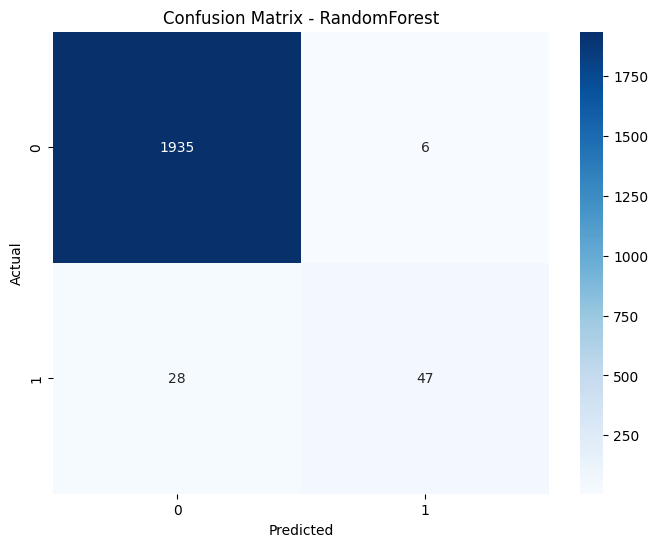

Training and evaluating LogisticRegression...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for LogisticRegression: {'classifier__C': 1.826864839284781, 'classifier__penalty': 'l2'}
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1941
           1       0.15      0.59      0.23        75

    accuracy                           0.86      2016
   macro avg       0.56      0.73      0.58      2016
weighted avg       0.95      0.86      0.90      2016

F1 Score for LogisticRegression: 0.2340
Precision for LogisticRegression: 0.1462
Recall for LogisticRegression: 0.5867
Accuracy for LogisticRegression: 0.8571



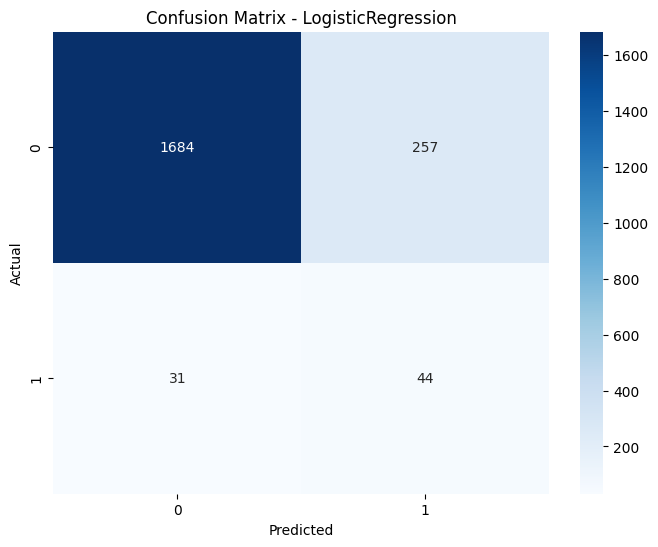

Training and evaluating XGBoost...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:48:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:48:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:48:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:48:21] WARN

Best parameters for XGBoost: {'classifier__colsample_bytree': 0.5972059724341318, 'classifier__learning_rate': 0.2524829668679824, 'classifier__max_depth': 7, 'classifier__n_estimators': 133, 'classifier__subsample': 0.9564590556512623}
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1941
           1       0.88      0.69      0.78        75

    accuracy                           0.99      2016
   macro avg       0.93      0.84      0.88      2016
weighted avg       0.98      0.99      0.98      2016

F1 Score for XGBoost: 0.7761
Precision for XGBoost: 0.8814
Recall for XGBoost: 0.6933
Accuracy for XGBoost: 0.9851



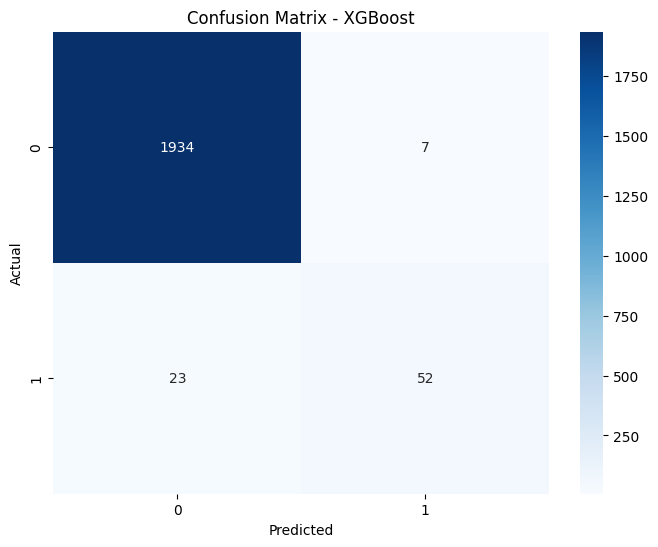

Training and evaluating LightGBM...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 190, number of negative: 5183
[LightGBM] [Info] Number of positive: 190, number of negative: 5183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 502
[LightGBM] [Info] Number of data points in the train set: 5373, number of used features: 12
[LightGBM] [Info] Number of data points in the train set: 5373, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035362 -> initscore=-3.306115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035362 -> initscore=-3.306115
[LightGBM] [Info] Start training

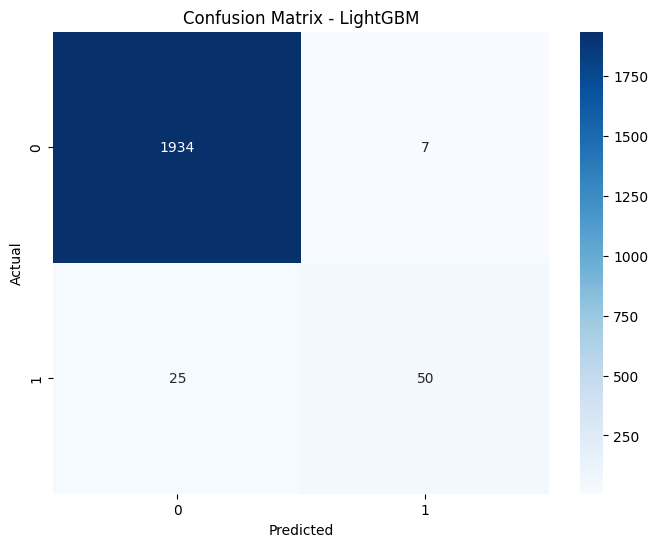

Training and evaluating SVM_RBF...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for SVM_RBF: {'classifier__C': 9.043801217710575, 'classifier__gamma': 0.0069796631661150875}
Classification Report for SVM_RBF:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1941
           1       0.20      0.55      0.30        75

    accuracy                           0.90      2016
   macro avg       0.59      0.73      0.62      2016
weighted avg       0.95      0.90      0.92      2016

F1 Score for SVM_RBF: 0.2960
Precision for SVM_RBF: 0.2030
Recall for SVM_RBF: 0.5467
Accuracy for SVM_RBF: 0.9033



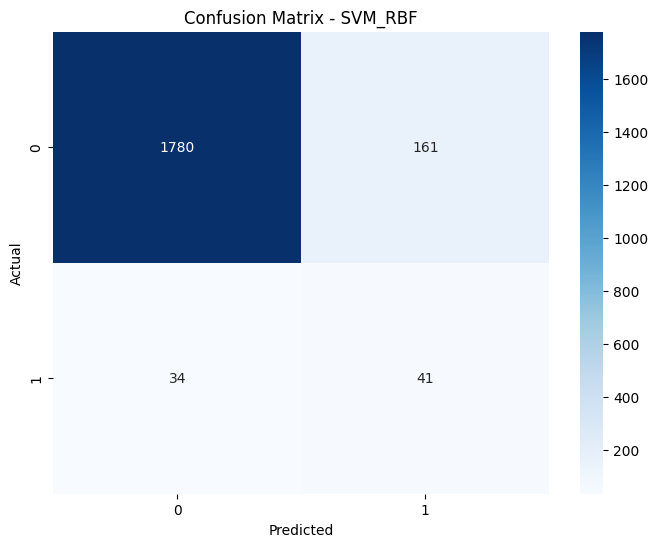

Training and evaluating GBM...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for GBM: {'classifier__learning_rate': 0.12862746917861248, 'classifier__max_depth': 6, 'classifier__n_estimators': 133, 'classifier__subsample': 0.9564590556512623}
Classification Report for GBM:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1941
           1       0.88      0.69      0.78        75

    accuracy                           0.99      2016
   macro avg       0.93      0.84      0.88      2016
weighted avg       0.98      0.99      0.98      2016

F1 Score for GBM: 0.7761
Precision for GBM: 0.8814
Recall for GBM: 0.6933
Accuracy for GBM: 0.9851



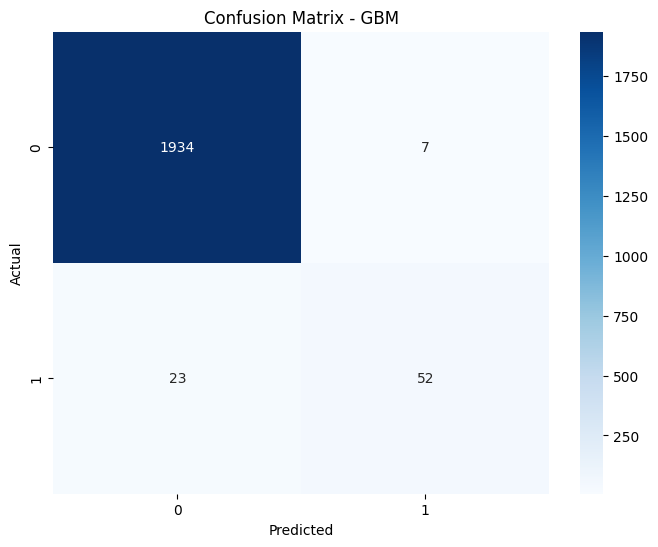

Training and evaluating ExtraTrees...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for ExtraTrees: {'classifier__criterion': 'entropy', 'classifier__max_depth': 27, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 283}
Classification Report for ExtraTrees:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1941
           1       0.84      0.51      0.63        75

    accuracy                           0.98      2016
   macro avg       0.91      0.75      0.81      2016
weighted avg       0.98      0.98      0.98      2016

F1 Score for ExtraTrees: 0.6333
Precision for ExtraTrees: 0.8444
Recall for ExtraTrees: 0.5067
Accuracy for ExtraTrees: 0.9782



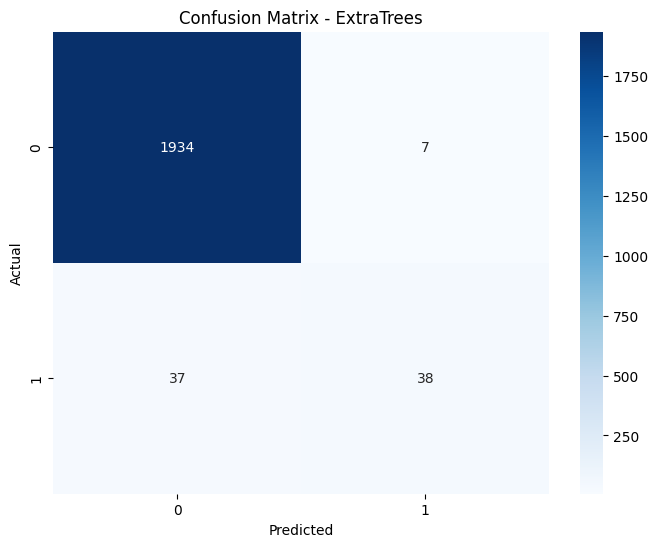

Training and evaluation complete!

--- Summary of Results ---
Model: RandomForest
  F1 Score: 0.7344
  Precision: 0.8868
  Recall: 0.6267
  Accuracy: 0.9831
  Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 19, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 335}
------------------------------
Model: LogisticRegression
  F1 Score: 0.2340
  Precision: 0.1462
  Recall: 0.5867
  Accuracy: 0.8571
  Best Parameters: {'classifier__C': 1.826864839284781, 'classifier__penalty': 'l2'}
------------------------------
Model: XGBoost
  F1 Score: 0.7761
  Precision: 0.8814
  Recall: 0.6933
  Accuracy: 0.9851
  Best Parameters: {'classifier__colsample_bytree': 0.5972059724341318, 'classifier__learning_rate': 0.2524829668679824, 'classifier__max_depth': 7, 'classifier__n_estimators': 133, 'classifier__subsample': 0.9564590556512623}
------------------------------
Model: LightGBM
  F1 Score: 0.7576
  Precision: 0.8772
  Reca

In [71]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from scipy.stats import randint, loguniform, uniform
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate_models(X, y):
    """Trains and evaluates multiple machine learning models and returns best models."""

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

    # Directly define the features we want to use
    numerical_features = [
        'retweet_count',
        'mentions_by_others',
        'frequency_change_1d',
        'frequency_change_3d',
        'degree_centrality',
        'betweenness_centrality',
        'eigenvector_centrality'
    ]

    categorical_features = ['handles_mentioned']

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), [col for col in numerical_features if col in X_train.columns]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), [col for col in categorical_features if col in X_train.columns])
    ], remainder='passthrough')

    models = {
        'RandomForest': {
            'model': RandomForestClassifier(random_state=69, n_jobs=-1),
            'params': {
                'classifier__n_estimators': randint(100, 400),
                'classifier__max_depth': [None] + list(randint(5, 30).rvs(5)),
                'classifier__min_samples_split': randint(2, 10),
                'classifier__min_samples_leaf': randint(1, 5),
                'classifier__criterion': ['gini', 'entropy']
            }
        },
        'LogisticRegression': {
            'model': LogisticRegression(random_state=69, solver='liblinear', class_weight='balanced'),
            'params': {
                'classifier__C': loguniform(0.001, 10.0),
                'classifier__penalty': ['l1', 'l2']
            }
        },
        'XGBoost': {
            'model': XGBClassifier(random_state=69, use_label_encoder=False, eval_metric='logloss', n_jobs=-1),
            'params': {
                'classifier__n_estimators': randint(100, 400),
                'classifier__learning_rate': loguniform(0.01, 0.3),
                'classifier__max_depth': randint(3, 8),
                'classifier__subsample': uniform(0.01, 0.99),
                'classifier__colsample_bytree': uniform(0.01, 0.99)
            }
        },
        'LightGBM': {
            'model': LGBMClassifier(random_state=69, n_jobs=-1),
            'params': {
                'classifier__n_estimators': randint(100, 400),
                'classifier__learning_rate': loguniform(0.01, 0.3),
                'classifier__max_depth': randint(3, 8),
                'classifier__num_leaves': randint(20, 100),
                'classifier__subsample': uniform(0.01, 0.99),
                'classifier__colsample_bytree': uniform(0.01, 0.99)
            }
        },
        'SVM_RBF': {
            'model': SVC(random_state=69, kernel='rbf', class_weight='balanced'),
            'params': {
                'classifier__C': loguniform(0.1, 10.0),
                'classifier__gamma': loguniform(0.001, 1.0)
            }
        },
        'GBM': {
            'model': GradientBoostingClassifier(random_state=69),
            'params': {
                'classifier__n_estimators': randint(100, 400),
                'classifier__learning_rate': uniform(0.01, 0.2),
                'classifier__max_depth': randint(3, 8),
                'classifier__subsample': uniform(0.01, 0.99)
            }
        },
        'ExtraTrees': {
            'model': ExtraTreesClassifier(random_state=69, n_jobs=-1),
            'params': {
                'classifier__n_estimators': randint(100, 400),
                'classifier__max_depth': [None] + list(randint(5, 30).rvs(5)),
                'classifier__min_samples_split': randint(2, 10),
                'classifier__min_samples_leaf': randint(1, 5),
                'classifier__criterion': ['gini', 'entropy']
            }
        }
    }

    best_models = {}
    results = {}

    for name, model_info in models.items():
        print(f"Training and evaluating {name}...")
        model = model_info['model']
        params = model_info['params']

        pipeline = Pipeline([
            ('preprocessing', preprocessor),
            ('classifier', model)
        ])

        random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=params,
            n_iter=50,
            scoring='f1',
            cv=3,
            verbose=1,
            n_jobs=-1,
            random_state=69,
            error_score='raise'
        )

        random_search.fit(X_train, y_train)

        best_models[name] = random_search.best_estimator_

        y_pred = best_models[name].predict(X_test)

        report = classification_report(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        results[name] = {
            'best_params': random_search.best_params_,
            'classification_report': report,
            'f1_score': f1,
            'precision': precision,
            'recall': recall,
            'accuracy': accuracy,
            'confusion_matrix': cm
        }

        print(f"Best parameters for {name}: {random_search.best_params_}")
        print(f"Classification Report for {name}:\n{report}")
        print(f"F1 Score for {name}: {f1:.4f}")
        print(f"Precision for {name}: {precision:.4f}")
        print(f"Recall for {name}: {recall:.4f}")
        print(f"Accuracy for {name}: {accuracy:.4f}\n")

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    print("Training and evaluation complete!")
    print("\n--- Summary of Results ---")
    for name, result in results.items():
        print(f"Model: {name}")
        print(f"  F1 Score: {result['f1_score']:.4f}")
        print(f"  Precision: {result['precision']:.4f}")
        print(f"  Recall: {result['recall']:.4f}")
        print(f"  Accuracy: {result['accuracy']:.4f}")
        print(f"  Best Parameters: {result['best_params']}")
        print("-" * 30)

    return best_models, results

# Example Usage
# Assuming stock_tweet_data is your DataFrame
features = [
    'handles_mentioned',
    'retweet_count',
    'mentions_by_others',
    'frequency_change_1d',
    'frequency_change_3d',
    'degree_centrality',
    'betweenness_centrality',
    'eigenvector_centrality'
]



best_models, results = train_and_evaluate_models(X, y)
# joblib.dump(best_models['RandomForest'], 'random_forest_model.joblib') #example save

#### Models saving

In [72]:
import joblib

# Assuming 'best_models' dictionary is available from the previous code chunk
# and contains the trained models

if 'best_models' in locals(): # Check if best_models exists
    for model_name, model in best_models.items():
        joblib.dump(model, f'models/network_analysis_{model_name}_model.joblib')
        print(f"{model_name} model saved to {model_name}_model.joblib")
else:
    print("Error: 'best_models' dictionary not found. Please run the training code chunk first.")

RandomForest model saved to RandomForest_model.joblib
LogisticRegression model saved to LogisticRegression_model.joblib
XGBoost model saved to XGBoost_model.joblib
LightGBM model saved to LightGBM_model.joblib
SVM_RBF model saved to SVM_RBF_model.joblib
GBM model saved to GBM_model.joblib
ExtraTrees model saved to ExtraTrees_model.joblib
